In [ ]:
# Download the dataset from the original paper
# !wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
# !tar xzvf food-101.tar.gz


In [1]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, InputLayer, MaxPooling2D, Dropout
from keras.losses import SparseCategoricalCrossentropy
import numpy as np
import h5py
import matplotlib.pyplot as plt
import cv2

In [2]:
# Plot loss function and accuracy over each epoch
def plot_results(history):
  fig, ax = plt.subplots(1, 2, figsize=(15,5))
  ax[0].set_title('loss')
  ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
  ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
  ax[1].set_title('accuracy')
  ax[1].plot(history.epoch, history.history["accuracy"], label="Train acc")
  ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation acc")
  ax[0].legend()
  ax[1].legend()

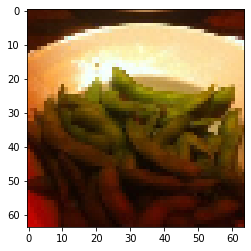

In [3]:
file_train = 'food_c101_n10099_r64x64x3.h5'
file_test = 'food_test_c101_n1000_r64x64x3.h5'

train_data = h5py.File(file_train, 'r')
test_data = h5py.File(file_test, 'r')


x_train = train_data['images']
x_train = np.asarray(x_train)
x_train = x_train.astype('float32') / 255.

y_train = train_data['category']
y_train = np.where(y_train[...] == True) [1]
y_train = y_train.astype('uint8')

catagory_names = train_data['category_names']

x_test = test_data['images']
x_test = np.asarray(x_test)
x_test = x_test.astype('float32') / 255.

y_test = test_data['category']
y_test = np.where(y_test[...] == True) [1]
y_test = y_test.astype('uint8')

plt.imshow(x_train[0])
plt.show()



In [4]:
# LeNet-5 Convolutional Neural Network
LeNet5 = keras.Sequential(name='LeNet-5')
LeNet5.add(InputLayer(input_shape=(64, 64, 3)))
LeNet5.add(Conv2D(filters=6, kernel_size=(5,5), strides=(1,1), activation='tanh', padding='same', name='C1'))
LeNet5.add(AveragePooling2D(pool_size=(2,2), strides=(1,1), padding='valid', name='A1'))
LeNet5.add(Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), activation='tanh', name='C2'))
LeNet5.add(AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='valid', name='A2'))
LeNet5.add(Conv2D(filters=120, kernel_size=(5,5), strides=(1,1), activation='tanh', padding='valid', name='C3'))
LeNet5.add(Flatten(name='F'))
LeNet5.add(Dense(units=200, activation='tanh', name='D1'))
LeNet5.add(Dense(units=200, activation='tanh', name='D2'))
LeNet5.add(Dense(units=101, activation='softmax', name='O'))

LeNet5.summary()

Model: "LeNet-5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
C1 (Conv2D)                  (None, 64, 64, 6)         456       
_________________________________________________________________
A1 (AveragePooling2D)        (None, 63, 63, 6)         0         
_________________________________________________________________
C2 (Conv2D)                  (None, 59, 59, 16)        2416      
_________________________________________________________________
A2 (AveragePooling2D)        (None, 29, 29, 16)        0         
_________________________________________________________________
C3 (Conv2D)                  (None, 25, 25, 120)       48120     
_________________________________________________________________
F (Flatten)                  (None, 75000)             0         
_________________________________________________________________
D1 (Dense)                   (None, 200)               1500

In [5]:
LeNet5.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

history = LeNet5.fit(x_train, y_train, batch_size=250, epochs=50, verbose=1, validation_data=(x_test, y_test))

Epoch 1/50
41/41 [==============================] - 2s 57ms/step - loss: 4.5879 - accuracy: 0.0298 - val_loss: 4.5328 - val_accuracy: 0.0300
Epoch 2/50
41/41 [==============================] - 2s 50ms/step - loss: 4.3000 - accuracy: 0.0629 - val_loss: 4.4864 - val_accuracy: 0.0390
Epoch 3/50
41/41 [==============================] - 2s 49ms/step - loss: 3.9007 - accuracy: 0.1549 - val_loss: 4.5010 - val_accuracy: 0.0510
Epoch 4/50
41/41 [==============================] - 2s 50ms/step - loss: 3.3421 - accuracy: 0.3040 - val_loss: 4.6575 - val_accuracy: 0.0440
Epoch 5/50
41/41 [==============================] - 2s 49ms/step - loss: 2.7495 - accuracy: 0.4666 - val_loss: 4.7567 - val_accuracy: 0.0450
Epoch 6/50
41/41 [==============================] - 2s 49ms/step - loss: 2.1241 - accuracy: 0.6359 - val_loss: 4.9124 - val_accuracy: 0.0360
Epoch 7/50
41/41 [==============================] - 2s 50ms/step - loss: 1.5519 - accuracy: 0.7708 - val_loss: 5.1410 - val_accuracy: 0.0370
Epoch 8/50
41

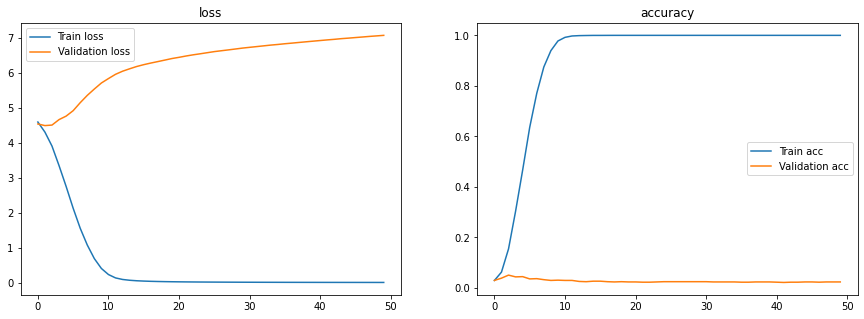

In [6]:
# Plot loss function and accuracy over each epoch
plot_results(history)
plt.show()

In [7]:
# AlexNet
AlexNet = keras.Sequential(name='AlexNet')
AlexNet.add(InputLayer(input_shape=(64,64,3)))
AlexNet.add(Conv2D(filters=96,  kernel_size=(5,5), strides=(1,1), activation='relu'))
AlexNet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
AlexNet.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu'))
AlexNet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu'))
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu'))
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu'))
AlexNet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
AlexNet.add(Flatten())
AlexNet.add(Dense(4096, activation='relu'))
AlexNet.add(Dropout(0.4))
AlexNet.add(Dense(4096, activation='relu'))
AlexNet.add(Dropout(0.4))
AlexNet.add(Dense(1000, activation='relu'))
AlexNet.add(Dropout(0.4))
AlexNet.add(Dense(101, activation='softmax'))

AlexNet.summary()

AlexNet.compile(loss=SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])


Model: "AlexNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 60, 60, 96)        7296      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 29, 29, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 384)       885120    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 384)         1327488   
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 6, 6, 256)         8849

In [8]:
history = AlexNet.fit(x_train, y_train, batch_size=250, epochs=80, verbose=1, validation_data=(x_test, y_test))

Epoch 1/80
41/41 [==============================] - 6s 147ms/step - loss: 4.6241 - accuracy: 0.0114 - val_loss: 4.6157 - val_accuracy: 0.0080
Epoch 2/80
41/41 [==============================] - 5s 130ms/step - loss: 4.6144 - accuracy: 0.0094 - val_loss: 4.6178 - val_accuracy: 0.0120
Epoch 3/80
41/41 [==============================] - 5s 130ms/step - loss: 4.6148 - accuracy: 0.0108 - val_loss: 4.6183 - val_accuracy: 0.0100
Epoch 4/80
41/41 [==============================] - 5s 130ms/step - loss: 4.6135 - accuracy: 0.0111 - val_loss: 4.6144 - val_accuracy: 0.0060
Epoch 5/80
41/41 [==============================] - 5s 130ms/step - loss: 4.6088 - accuracy: 0.0119 - val_loss: 4.6159 - val_accuracy: 0.0090
Epoch 6/80
41/41 [==============================] - 5s 129ms/step - loss: 4.6104 - accuracy: 0.0106 - val_loss: 4.6159 - val_accuracy: 0.0090
Epoch 7/80
41/41 [==============================] - 5s 129ms/step - loss: 4.6135 - accuracy: 0.0108 - val_loss: 4.6175 - val_accuracy: 0.0090
Epoch 

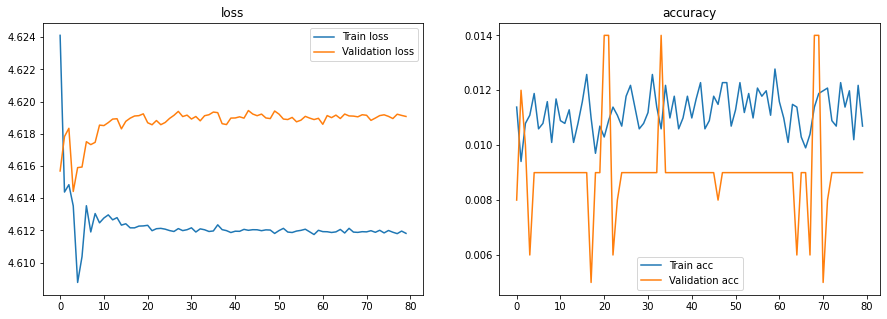

In [9]:
# Plot loss function and accuracy over each epoch
plot_results(history)
plt.show()

In [10]:
from keras.applications import VGG16
VGG16_model = VGG16(weights=None,input_shape=(64,64,3),classes=101)
VGG16_model.compile(loss=SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])
VGG16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0     

In [11]:
history = VGG16_model.fit(x_train, y_train, batch_size=250, epochs=50, verbose=1, validation_data=(x_test, y_test))

Epoch 1/50
41/41 [==============================] - 12s 298ms/step - loss: 4.6162 - accuracy: 0.0094 - val_loss: 4.6152 - val_accuracy: 0.0140
Epoch 2/50
41/41 [==============================] - 11s 263ms/step - loss: 4.6154 - accuracy: 0.0107 - val_loss: 4.6160 - val_accuracy: 0.0080
Epoch 3/50
41/41 [==============================] - 11s 262ms/step - loss: 4.6140 - accuracy: 0.0097 - val_loss: 4.6161 - val_accuracy: 0.0050
Epoch 4/50
41/41 [==============================] - 11s 262ms/step - loss: 4.6133 - accuracy: 0.0110 - val_loss: 4.6173 - val_accuracy: 0.0050
Epoch 5/50
41/41 [==============================] - 11s 263ms/step - loss: 4.6129 - accuracy: 0.0110 - val_loss: 4.6181 - val_accuracy: 0.0090
Epoch 6/50
41/41 [==============================] - 11s 263ms/step - loss: 4.6130 - accuracy: 0.0112 - val_loss: 4.6182 - val_accuracy: 0.0050
Epoch 7/50
41/41 [==============================] - 11s 265ms/step - loss: 4.6127 - accuracy: 0.0116 - val_loss: 4.6181 - val_accuracy: 0.0090

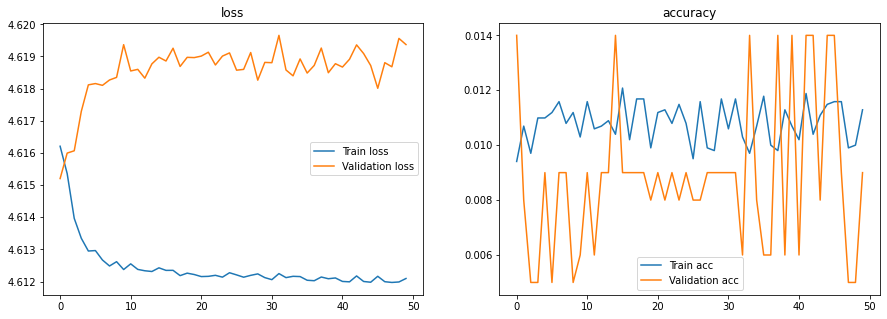

In [12]:
plot_results(history)
plt.show()